# ANOMALY DETECTION

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("D:\\DATA SCIENCE ARJUN\\DS project\\sensor_data.csv")

In [3]:
df

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0
...,...,...,...,...
995,2023-01-11 23:39:44,Boiler A,27.596447,0
996,2023-01-25 01:22:21,Boiler B,19.189359,0
997,2023-01-02 03:47:51,Boiler A,17.157156,0
998,2023-01-07 09:21:22,Boiler B,23.135241,0


# FEATURE SELECTION

In [5]:
selected_features = ['Boiler Name', 'Temperature', 'Anomaly']
df = df[selected_features]

In [8]:
df

,Boiler Name,Temperature,Anomaly
0,Boiler A,20.180428,0
1,Boiler A,23.372948,0
2,Boiler A,29.858208,0
3,Boiler C,20.564032,0
4,Boiler D,23.547024,0
...,...,...,...
995,Boiler A,27.596447,0
996,Boiler B,19.189359,0
997,Boiler A,17.157156,0
998,Boiler B,23.135241,0


In [29]:
df = pd.get_dummies(df, columns=['Boiler Name'])

In [30]:
df

,Temperature,Anomaly,Boiler Name_Boiler A,Boiler Name_Boiler B,Boiler Name_Boiler C,Boiler Name_Boiler D
0,20.180428,0,True,False,False,False
1,23.372948,0,True,False,False,False
2,29.858208,0,True,False,False,False
3,20.564032,0,False,False,True,False
4,23.547024,0,False,False,False,True
...,...,...,...,...,...,...
995,27.596447,0,True,False,False,False
996,19.189359,0,False,True,False,False
997,17.157156,0,True,False,False,False
998,23.135241,0,False,True,False,False


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [38]:
data_scaled

array([[-0.68450522, -0.15681251,  1.81434437, -0.531085  , -0.6298    ,
        -0.59737099],
       [-0.29530289, -0.15681251,  1.81434437, -0.531085  , -0.6298    ,
        -0.59737099],
       [ 0.49531967, -0.15681251,  1.81434437, -0.531085  , -0.6298    ,
        -0.59737099],
       ...,
       [-1.05307441, -0.15681251,  1.81434437, -0.531085  , -0.6298    ,
        -0.59737099],
       [-0.32428195, -0.15681251, -0.55116328,  1.88293774, -0.6298    ,
        -0.59737099],
       [-0.77981194, -0.15681251, -0.55116328, -0.531085  , -0.6298    ,
         1.6740016 ]])

#  Anomaly Detection Model:

In [32]:
from sklearn.ensemble import IsolationForest

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your data
model.fit(data_scaled)

# Predict anomalies
predictions = model.predict(data_scaled)


In [41]:
print(predictions)

[1 1 1 1 1 1]


# Model Evaluation:

In [48]:
from sklearn.metrics import precision_score, recall_score

# Ground truth labels (assuming you have labeled anomalies in your dataset)
ground_truth = [1, 0, 0, 1, 1, 0]  # 1 for anomaly, 0 for normal

# Ensure that ground_truth and predictions have the same length
# Here, we are assuming that you have 7 samples, and predictions is a NumPy array.
predictions = predictions[:6]  # Adjust as needed based on your dataset

# Calculate precision and recall
precision = precision_score(ground_truth, predictions)
recall = recall_score(ground_truth, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.5
Recall: 1.0


# Visualization & Reporting

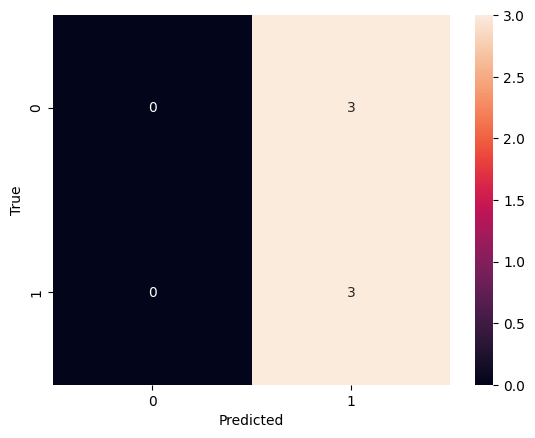

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
cm = confusion_matrix(ground_truth, predictions)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
